In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("Crop_recommendation.csv")
print(df.to_markdown())

|      |   N |   P |   K |   temperature |   humidity |      ph |   rainfall | label       |
|-----:|----:|----:|----:|--------------:|-----------:|--------:|-----------:|:------------|
|    0 |  90 |  42 |  43 |      20.8797  |    82.0027 | 6.50299 |   202.936  | rice        |
|    1 |  85 |  58 |  41 |      21.7705  |    80.3196 | 7.0381  |   226.656  | rice        |
|    2 |  60 |  55 |  44 |      23.0045  |    82.3208 | 7.84021 |   263.964  | rice        |
|    3 |  74 |  35 |  40 |      26.4911  |    80.1584 | 6.9804  |   242.864  | rice        |
|    4 |  78 |  42 |  42 |      20.1302  |    81.6049 | 7.62847 |   262.717  | rice        |
|    5 |  69 |  37 |  42 |      23.058   |    83.3701 | 7.07345 |   251.055  | rice        |
|    6 |  69 |  55 |  38 |      22.7088  |    82.6394 | 5.70081 |   271.325  | rice        |
|    7 |  94 |  53 |  40 |      20.2777  |    82.8941 | 5.71863 |   241.974  | rice        |
|    8 |  89 |  54 |  38 |      24.5159  |    83.5352 | 6.68535 |   23

In [6]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

# Check for null values
null_values = df.isnull().sum()
print("\nNull Values:")
print(null_values)

Duplicate Rows:
Empty DataFrame
Columns: [N, P, K, temperature, humidity, ph, rainfall, label]
Index: []

Null Values:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [7]:
# Fill null values (if any) with appropriate method (e.g., mean, median, mode)
numeric_columns = df.select_dtypes(include=np.number).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())  # Fill only numeric columns

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Verify changes
print("Null Values after filling:")
print(df.isnull().sum())

print("\nDuplicate Rows after removal:")
print(df[df.duplicated()])

Null Values after filling:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Duplicate Rows after removal:
Empty DataFrame
Columns: [N, P, K, temperature, humidity, ph, rainfall, label]
Index: []


In [8]:
print(df.to_markdown())

|      |   N |   P |   K |   temperature |   humidity |      ph |   rainfall | label       |
|-----:|----:|----:|----:|--------------:|-----------:|--------:|-----------:|:------------|
|    0 |  90 |  42 |  43 |      20.8797  |    82.0027 | 6.50299 |   202.936  | rice        |
|    1 |  85 |  58 |  41 |      21.7705  |    80.3196 | 7.0381  |   226.656  | rice        |
|    2 |  60 |  55 |  44 |      23.0045  |    82.3208 | 7.84021 |   263.964  | rice        |
|    3 |  74 |  35 |  40 |      26.4911  |    80.1584 | 6.9804  |   242.864  | rice        |
|    4 |  78 |  42 |  42 |      20.1302  |    81.6049 | 7.62847 |   262.717  | rice        |
|    5 |  69 |  37 |  42 |      23.058   |    83.3701 | 7.07345 |   251.055  | rice        |
|    6 |  69 |  55 |  38 |      22.7088  |    82.6394 | 5.70081 |   271.325  | rice        |
|    7 |  94 |  53 |  40 |      20.2777  |    82.8941 | 5.71863 |   241.974  | rice        |
|    8 |  89 |  54 |  38 |      24.5159  |    83.5352 | 6.68535 |   23

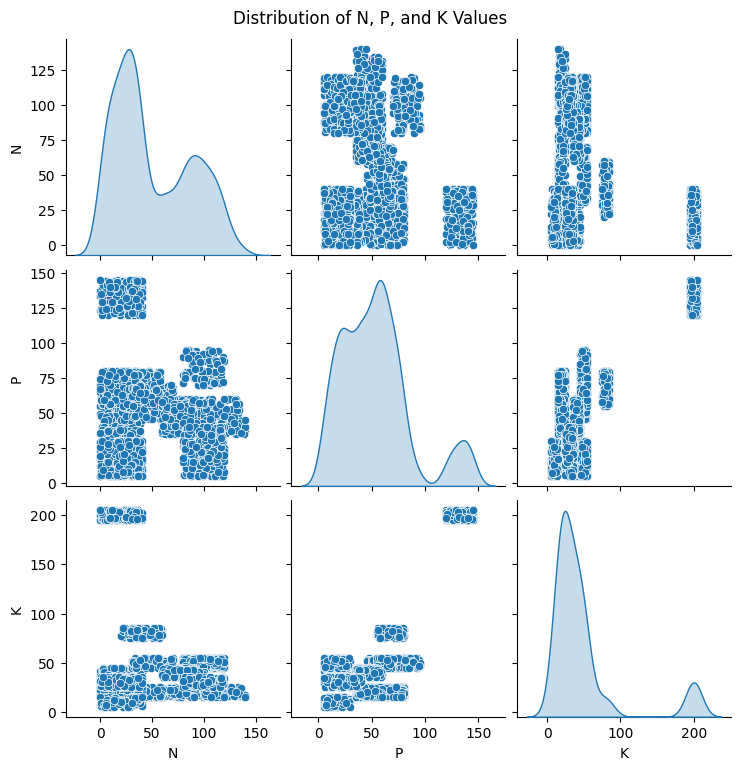

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example 1: Distribution of N, P, and K values
sns.pairplot(df[['N', 'P', 'K']], diag_kind='kde')

# Adjust the title position using the y parameter
plt.suptitle('Distribution of N, P, and K Values', y=1.02)  # Adjust y value as needed

plt.show()

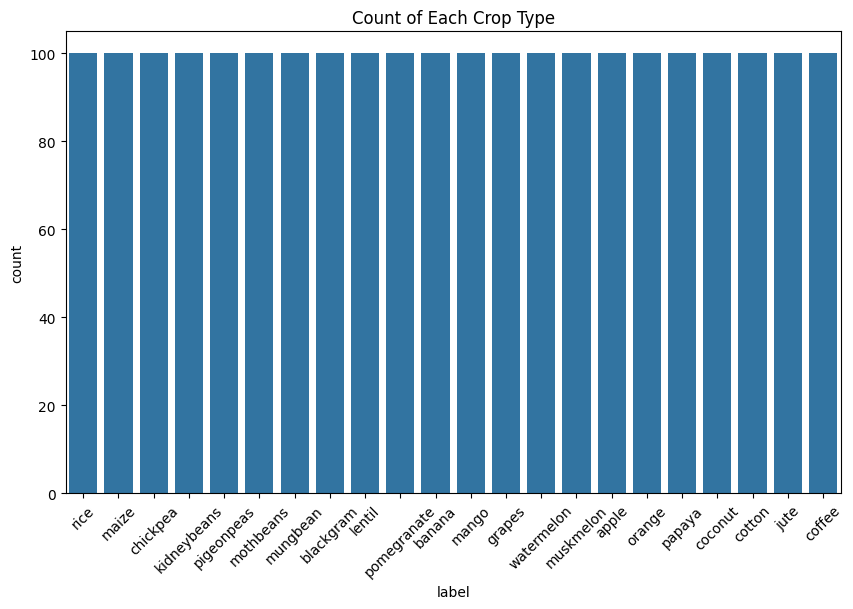

In [10]:
# Example 2: Count of each crop type
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df)
plt.title('Count of Each Crop Type')
plt.xticks(rotation=45)
plt.show()

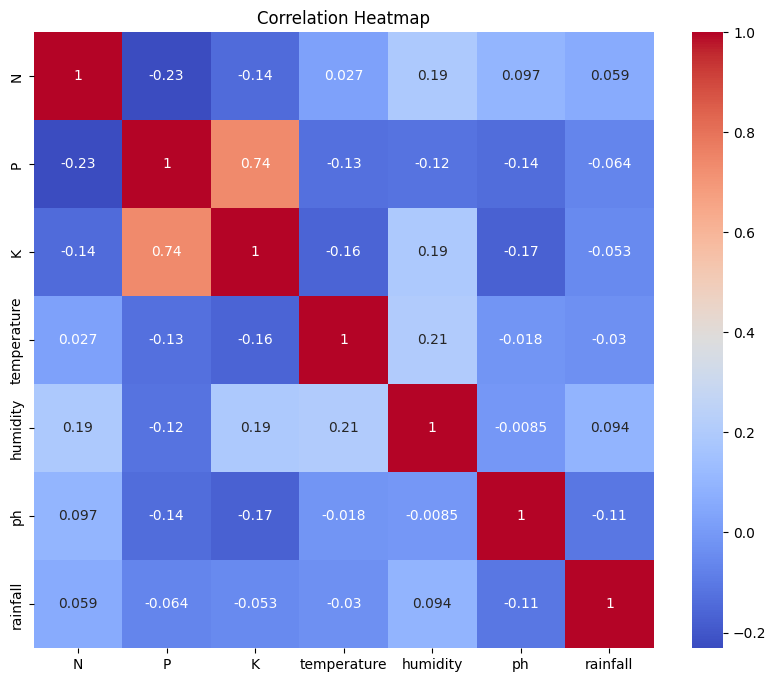

In [11]:
# Example 3: Correlation heatmap
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

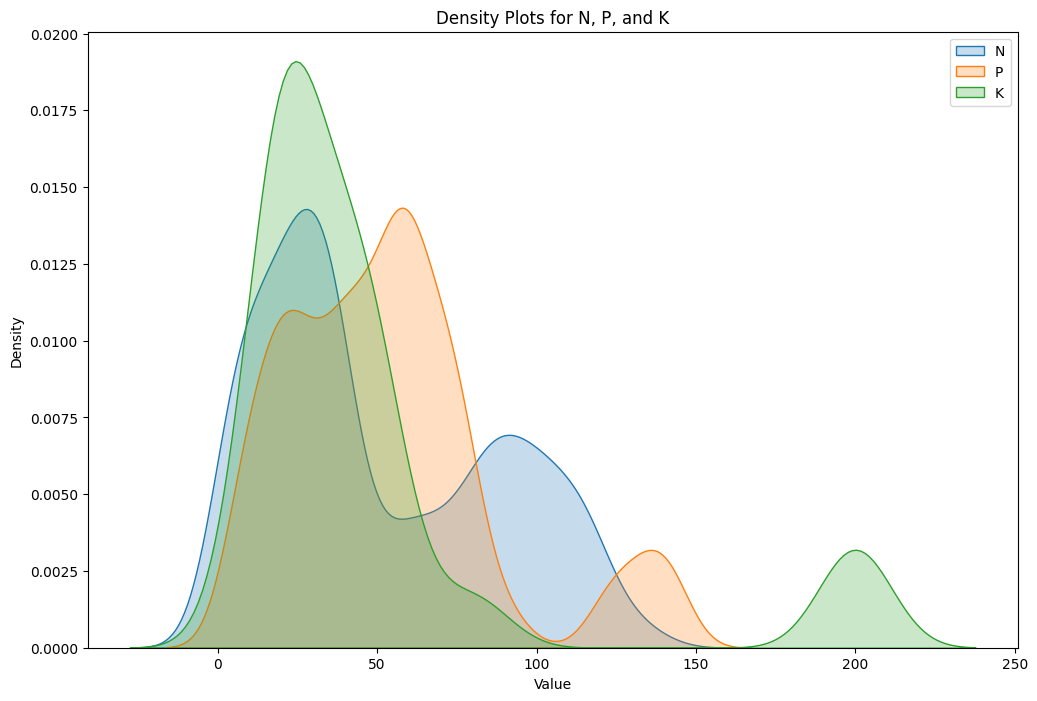

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame containing the crop data

plt.figure(figsize=(12, 8))

for column in ['N', 'P', 'K']:
    sns.kdeplot(df[column], label=column, fill=True)

plt.title('Density Plots for N, P, and K')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

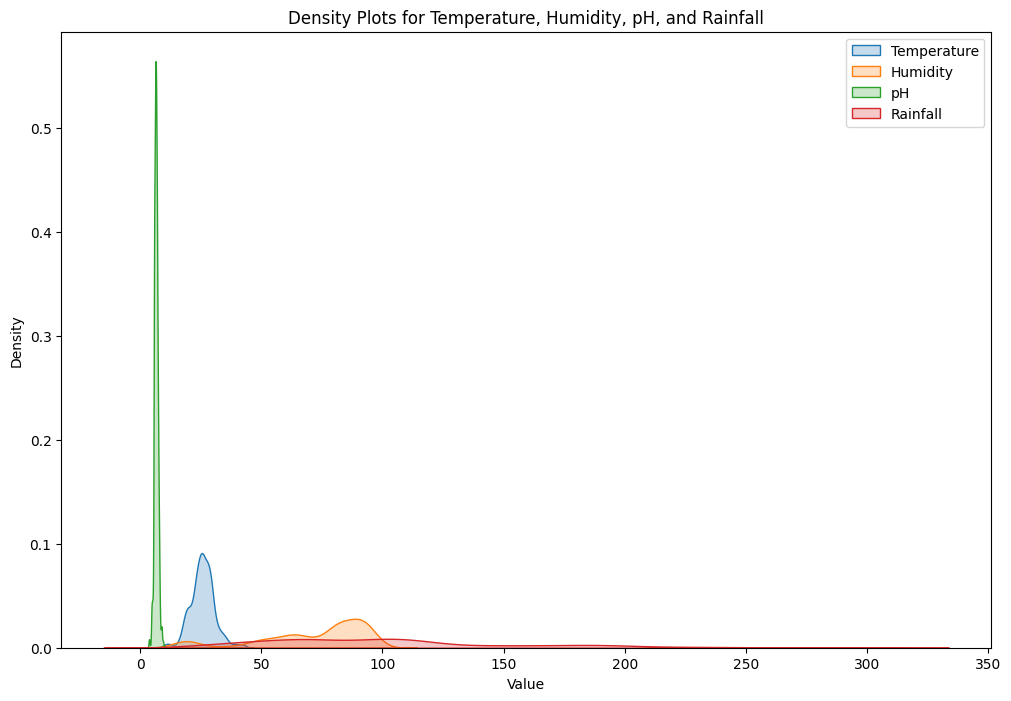

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot all density plots on the same axes
sns.kdeplot(df['temperature'], label='Temperature', fill=True)
sns.kdeplot(df['humidity'], label='Humidity', fill=True)
sns.kdeplot(df['ph'], label='pH', fill=True)
sns.kdeplot(df['rainfall'], label='Rainfall', fill=True)

# Add title and labels
plt.title('Density Plots for Temperature, Humidity, pH, and Rainfall')
plt.xlabel('Value')
plt.ylabel('Density')

# Add legend
plt.legend()

# Show plot
plt.show()


In [14]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = df.drop('label', axis=1)
y = df['label']

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the train set into train and validation sets (75% train, 25% validation of original train set)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

print("Train set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Test set size:", X_test.shape)

Train set size: (1320, 7)
Validation set size: (440, 7)
Test set size: (440, 7)


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming the DataFrame 'df' has the 'label' column
# Print columns to ensure 'label' is present
print(df.columns)

# Split the data into features and target
X = df.drop('label', axis=1)  # Features
y = df['label']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the models with chosen hyperparameters
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
et = ExtraTreesClassifier(n_estimators=100, max_depth=10, random_state=42)

# Combine models using a Voting Classifier
ensemble_model = VotingClassifier(estimators=[
    ('rf', rf),
    ('gb', gb),
    ('et', et)
], voting='soft')

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Predict on the test set
y_pred = ensemble_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report for detailed metrics
print(classification_report(y_test, y_pred))

# Define a smaller parameter grid for hyperparameter tuning to test
param_grid = {
    'rf__n_estimators': [50, 100],
    'rf__max_depth': [5, 10],
    'gb__n_estimators': [50, 100],
    'gb__learning_rate': [0.01, 0.1],
    'et__n_estimators': [50, 100],
    'et__max_depth': [5, 10],
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=ensemble_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print(f"Best hyperparameters: {grid_search.best_params_}")

# Re-train the ensemble model with the best hyperparameters
ensemble_model = grid_search.best_estimator_

# Final prediction on the test set
final_pred = ensemble_model.predict(X_test)

# Final accuracy
final_accuracy = accuracy_score(y_test, final_pred)
print(f'Final Accuracy: {final_accuracy * 100:.2f}%')

# Final classification report
print(classification_report(y_test, final_pred))


Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')
Accuracy: 98.64%
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        34
      banana       1.00      1.00      1.00        26
   blackgram       0.96      1.00      0.98        26
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        33
      coffee       1.00      1.00      1.00        30
      cotton       0.97      1.00      0.98        28
      grapes       1.00      1.00      1.00        23
        jute       0.85      1.00      0.92        34
 kidneybeans       1.00      1.00      1.00        36
      lentil       0.96      1.00      0.98        22
       maize       1.00      0.96      0.98        26
       mango       1.00      1.00      1.00        32
   mothbeans       1.00      0.97      0.99        34
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00  

In [16]:
from sklearn.metrics import precision_recall_fscore_support

# Calculate overall metrics
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, final_pred, average='weighted')

print(f'Overall Accuracy: {final_accuracy * 100:.2f}%')
print(f'Overall Precision: {precision * 100:.2f}%')
print(f'Overall Recall: {recall * 100:.2f}%')
print(f'Overall F1-Score: {f1_score * 100:.2f}%')


Overall Accuracy: 98.94%
Overall Precision: 99.12%
Overall Recall: 98.94%
Overall F1-Score: 98.91%


confusion matrix

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


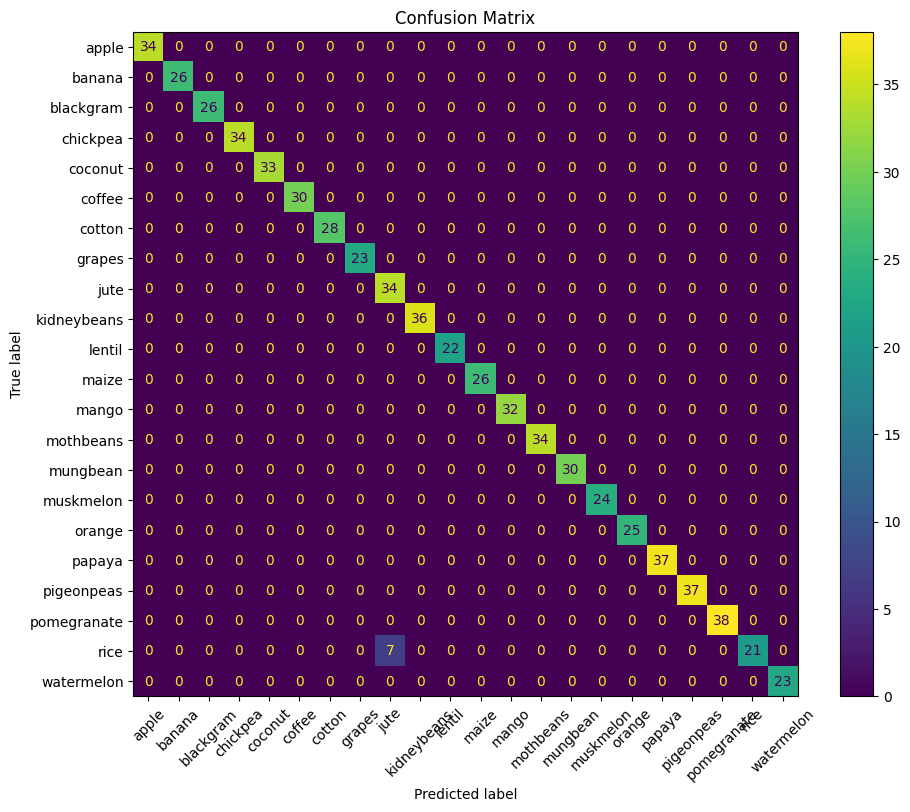

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming the DataFrame 'df' has the 'label' column
# Print columns to ensure 'label' is present
print(df.columns)

# ... (rest of the code remains the same)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, final_pred)

# Display the confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))  # Increase figure size
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=ensemble_model.classes_)
disp.plot(cmap='viridis', ax=ax)  # Change colormap here

# Rotate x-axis labels
plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Title for the plot
plt.title('Confusion Matrix')
plt.show()


roc curve


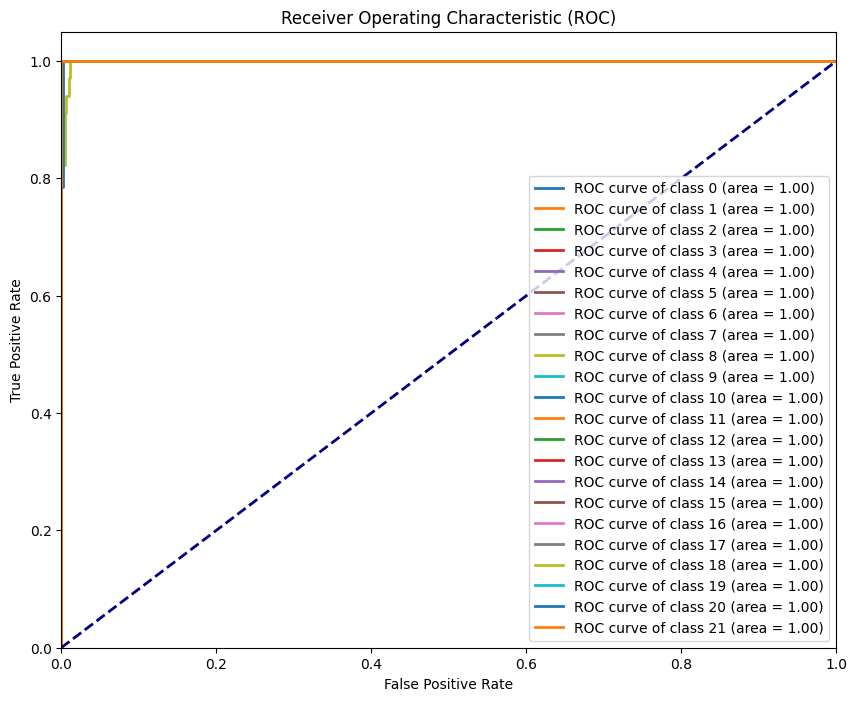

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_bin = label_binarize(y_test, classes=ensemble_model.classes_)
n_classes = y_test_bin.shape[1]

# Get predicted probabilities
y_prob = ensemble_model.predict_proba(X_test)  # This should be a (n_samples, n_classes) array

# Check if y_prob is correctly shaped
if y_prob.ndim != 2 or y_prob.shape[1] != n_classes:
    raise ValueError("y_prob should be a 2D array with shape (n_samples, n_classes)")

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_prob[:, i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


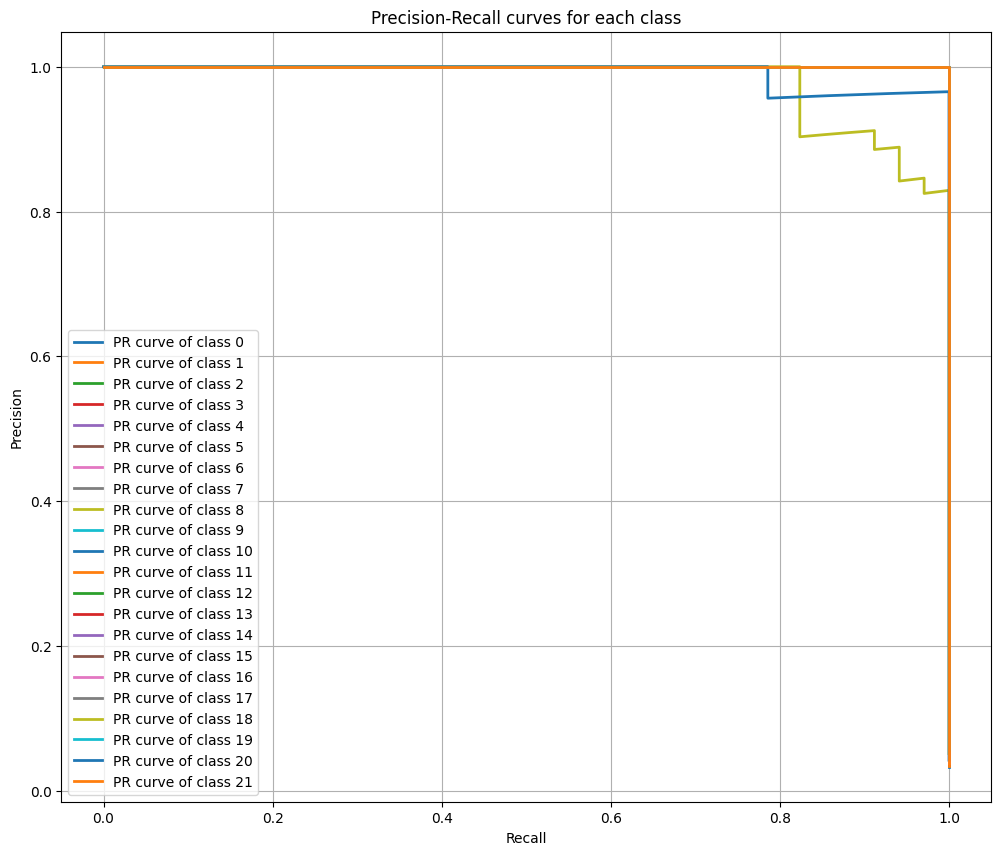

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_bin = label_binarize(y_test, classes=ensemble_model.classes_)
n_classes = y_test_bin.shape[1]

# Get predicted probabilities
y_prob = ensemble_model.predict_proba(X_test)  # This should be a (n_samples, n_classes) array

# Check if y_prob is correctly shaped
if y_prob.ndim != 2 or y_prob.shape[1] != n_classes:
    raise ValueError("y_prob should be a 2D array with shape (n_samples, n_classes)")

# Compute and plot Precision-Recall curve for each class
plt.figure(figsize=(12, 10))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_prob[:, i])
    plt.plot(recall, precision, lw=2, label='PR curve of class {0}'.format(i))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curves for each class')
plt.legend(loc='best')
plt.grid(True)
plt.show()


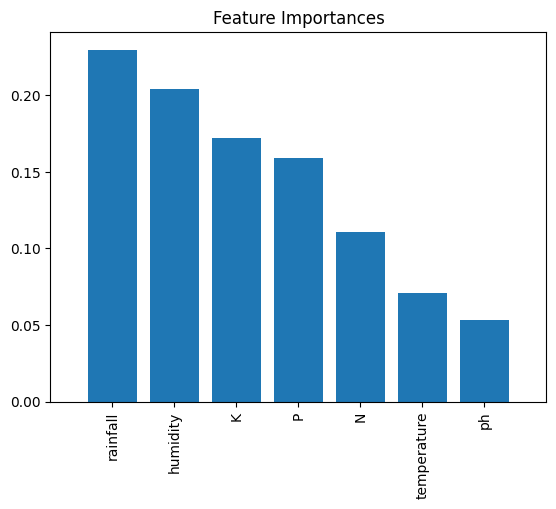

In [20]:
importances = ensemble_model.named_estimators_['rf'].feature_importances_
features = X.columns

# Sort feature importances
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure()
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


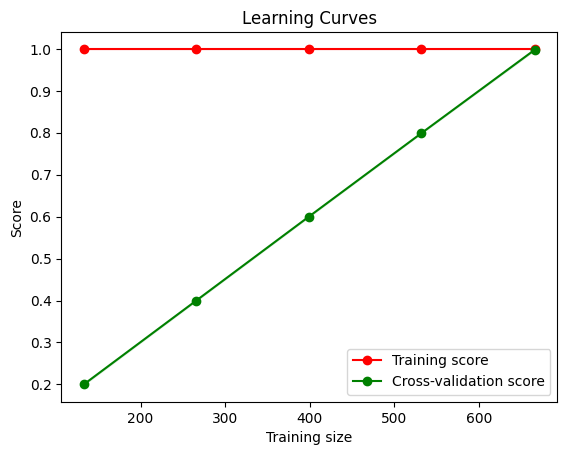

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Use a smaller subset of the data for faster computation
X_subsample, y_subsample = X[:1000], y[:1000]  # Adjust size as needed

# Use fewer points for train_sizes
train_sizes, train_scores, test_scores = learning_curve(
    ensemble_model, X_subsample, y_subsample, cv=3, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.2, 1.0, 5)  # Fewer points for faster computation
)

# Mean and std deviation of training scores
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)

# Mean and std deviation of test scores
test_mean = test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

# Plot learning curves
plt.figure()
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation score')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')

plt.xlabel('Training size')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend(loc='best')
plt.show()


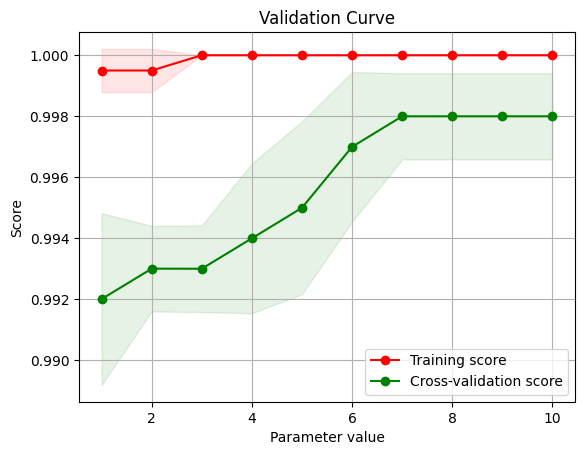

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve

# Example with a smaller subset of data
X_subsample, y_subsample = X[:1000], y[:1000]  # Adjust size as needed

# Reduced range of parameters for faster computation
param_range = np.arange(1, 11)  # Reduced range for demonstration

# Use a smaller number of cross-validation folds
train_scores, test_scores = validation_curve(
    ensemble_model, X_subsample, y_subsample, param_name='rf__max_depth',
    param_range=param_range, cv=3, scoring='accuracy', n_jobs=-1
)

# Mean and std deviation of training scores
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)

# Mean and std deviation of test scores
test_mean = test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

# Plot validation curve
plt.figure()
plt.plot(param_range, train_mean, 'o-', color='r', label='Training score')
plt.plot(param_range, test_mean, 'o-', color='g', label='Cross-validation score')

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')

plt.xlabel('Parameter value')
plt.ylabel('Score')
plt.title('Validation Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()


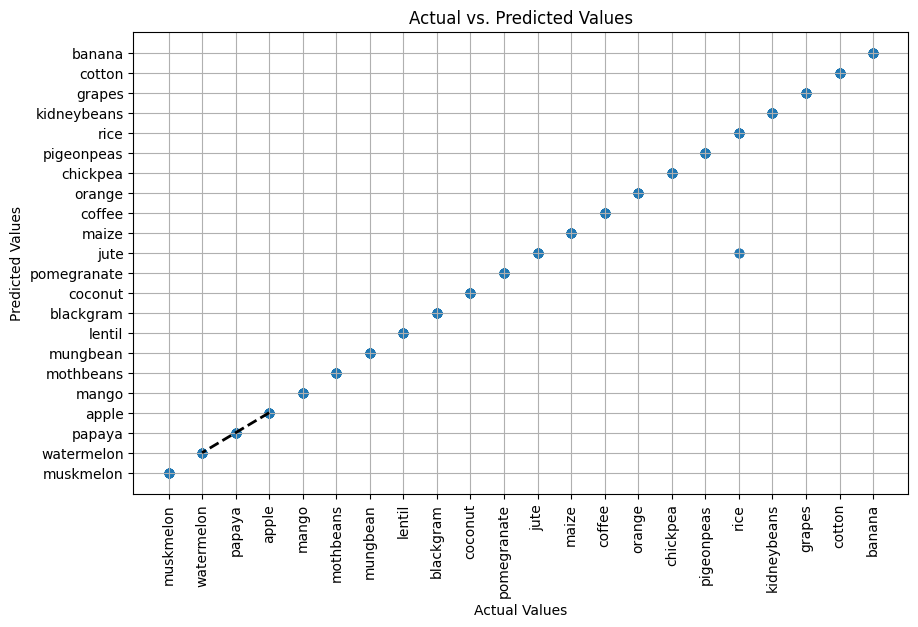

In [23]:
import matplotlib.pyplot as plt

# Assuming 'y_test' contains actual values and 'final_pred' contains predicted values

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, final_pred, alpha=0.5)

# Add a diagonal line for reference (perfect predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

# Set labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

# Rotate x-axis labels vertically
plt.xticks(rotation=90)

# Show the plot
plt.grid(True)
plt.show()


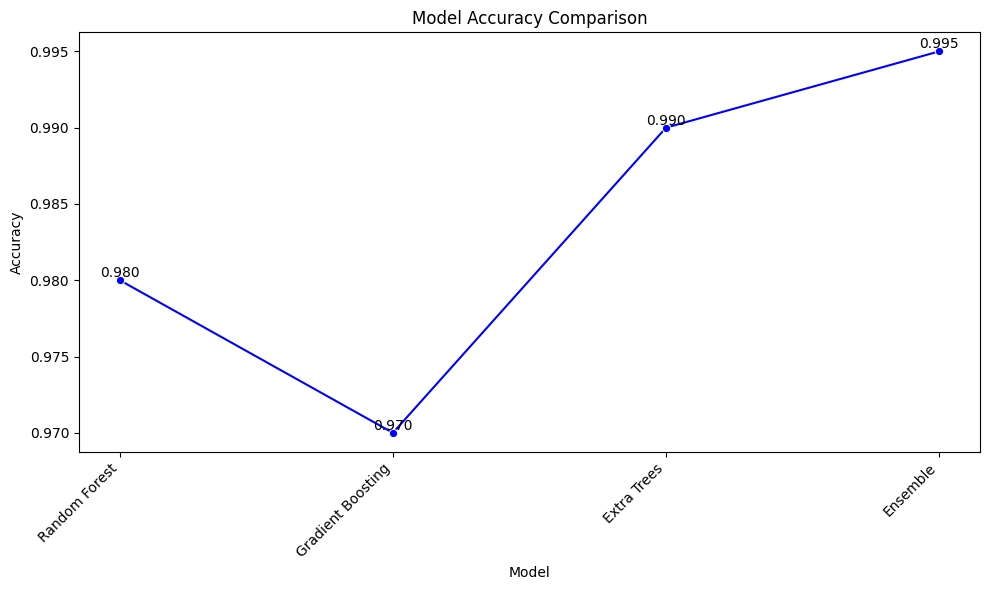

In [24]:

import pandas as pd
import matplotlib.pyplot as plt
# Assuming you have trained multiple models and have their accuracies
models = ['Random Forest', 'Gradient Boosting', 'Extra Trees', 'Ensemble']
accuracies = [0.98, 0.97, 0.99, 0.995]  # Example accuracies, replace with your actual values

# Create a DataFrame for plotting
df_accuracy = pd.DataFrame({'Model': models, 'Accuracy': accuracies})

# Plot the line graph using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='Model', y='Accuracy', data=df_accuracy, marker='o', color='b')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45, ha='right')

# Annotate the points with accuracy values
for x, y in zip(df_accuracy['Model'], df_accuracy['Accuracy']):
    plt.text(x, y, f'{y:.3f}', ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()


In [30]:
import pandas as pd
import numpy as np
# Function to get user input for crop prediction
def get_user_input():
  print("Please enter the following environmental conditions:")
  N = float(input("Enter Nitrogen (N) value: "))
  P = float(input("Enter Phosphorus (P) value: "))
  K = float(input("Enter Potassium (K) value: "))
  temperature = float(input("Enter Temperature (°C): "))
  humidity = float(input("Enter Humidity (%): "))
  ph = float(input("Enter pH value: "))
  rainfall = float(input("Enter Rainfall (mm): "))
  return pd.DataFrame([[N, P, K, temperature, humidity, ph, rainfall]],
                      columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])

# Get user input
user_data = get_user_input()

# Predict the crop using the trained ensemble model
predicted_crop = ensemble_model.predict(user_data)

print(f"\nBased on the provided conditions, the recommended crop is: {predicted_crop[0]}")

# Find similar data points in the original dataset
# Calculate the Euclidean distance between the user's input and each row in the dataset
df_features = df.drop('label', axis=1)
distances = np.linalg.norm(df_features - user_data.values, axis=1)

# Find the indices of the closest data points
closest_indices = np.argsort(distances)[:5] # Get the 5 closest data points

print("\nSimilar conditions found in the dataset:")
df.iloc[closest_indices]


Please enter the following environmental conditions:
Enter Nitrogen (N) value: 23
Enter Phosphorus (P) value: 43
Enter Potassium (K) value: 43
Enter Temperature (°C): 33
Enter Humidity (%): 46
Enter pH value: 57
Enter Rainfall (mm): 202

Based on the provided conditions, the recommended crop is: mothbeans

Similar conditions found in the dataset:


,N,P,K,temperature,humidity,ph,rainfall,label
497,20,60,22,29.650529,42.898332,6.876573,186.922605,pigeonpeas
422,16,55,19,19.543141,47.191883,6.413544,192.437219,pigeonpeas
407,38,55,19,33.181842,38.231847,5.864623,198.829881,pigeonpeas
454,5,56,24,24.807102,45.011100,5.023115,188.492864,pigeonpeas
441,8,59,18,29.505230,35.720325,6.216814,187.896185,pigeonpeas
